# Decision Trees: Regression

- This is a supplement material for the [Machine Learning Simplified](https://themlsbook.com) book. It sheds light on Python implementations of the topics discussed while all detailed explanations can be found in the book. 
- I also assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my code. 
- This material can be downloaded as a Jupyter notebook (Download button in the upper-right corner -> `.ipynb`) to reproduce the code and play around with it. 



## 1. Required Libraries & Functions

Before we start, we need to import few libraries and functions that we will use in this jupyterbook. You don't need to understand what those functions do for now.

In [2]:
# Libraries
from math import log
import numpy as np
import pandas as pd
from sklearn import tree
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

## 2. Probelm Representation

Let's recall Chapter X of [the Machine Learning Simplified book](https://themlsbook.com). We have a hypothetical dataset (Table XX in the MLS book) containing 14 days, with first 4 columns as features representing weather consitions and last column as a target variable representing hour of golf that were played that day.

| Outlook | Humidity | Temperature | Wind | Golf Hours Played |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| Sunny | Hot | High | Weak | 25 |
| Sunny | Hot | High | Strong | 30 |
| Overcast | Hot | High | Weak | 46 |
| Rain | Mild | High | Weak | 45 |
| Rain | Cold | Normal | Weak | 52 |
| Rain | Cold | Normal | Strong | 23 |
| Overcast | Cold | Normal | Strong | 43 |
| Sunny | Mild | High | Weak | 35 |
| Sunny | Cold | Normal | Weak | 38 |
| Rain | Mild | Normal | Weak | 46 |
| Sunny | Mild | Normal | Strong | 48 |
| Overcast | Mild | High | Strong | 52 |
| Overcast | Hot | Normal | Weak | 44 |
| Rain | Mild | High | Strong | 30 |







### 2.1. Create Hypothetical Dataset

Let's re-create aforementioned table in python. We use `pandas` library - a library that manages **PAN**el **DA**ta **S**ets - to do so. Note that we have already imported it in the beginning of this notebook.

In [3]:
#re-create a hypothetical dataset
data = {'Outlook': ["Sunny","Sunny","Overcast","Rain","Rain","Rain","Overcast","Sunny","Sunny","Rain","Sunny","Overcast","Overcast","Rain"], 
        'Humidity': ["Hot","Hot","Hot","Mild","Cold","Cold","Cold","Mild","Cold","Mild","Mild","Mild","Hot","Mild"],
        'Temperature': ["High","High","High","High","Normal","Normal","Normal","High","Normal","Normal","Normal","High","Normal","High"],
        'Wind': ["Weak","Strong","Weak","Weak","Weak","Strong","Strong","Weak","Weak","Weak","Strong","Strong","Weak","Strong"],
        'Hours': [25,30,46,45,52,23,43,35,38,46,48,52,44,30]
       }  

#transform dataset into a DataFrame df using pandas library
df = pd.DataFrame(data)  
  
#print the output
df


,Outlook,Humidity,Temperature,Wind,Hours
0,Sunny,Hot,High,Weak,25
1,Sunny,Hot,High,Strong,30
2,Overcast,Hot,High,Weak,46
3,Rain,Mild,High,Weak,45
4,Rain,Cold,Normal,Weak,52
5,Rain,Cold,Normal,Strong,23
6,Overcast,Cold,Normal,Strong,43
7,Sunny,Mild,High,Weak,35
8,Sunny,Cold,Normal,Weak,38
9,Rain,Mild,Normal,Weak,46


Dataset contains strings while decision tree algorithm needs numbers to work with. For that we use one-hot encoding.

In [9]:
# One-hot encoding in pandas can be done using get_dummies function
df_enc = pd.get_dummies(df)
df_enc

,Hours,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Humidity_Cold,Humidity_Hot,Humidity_Mild,Temperature_High,Temperature_Normal,Wind_Strong,Wind_Weak
0,25,0,0,1,0,1,0,1,0,0,1
1,30,0,0,1,0,1,0,1,0,1,0
2,46,1,0,0,0,1,0,1,0,0,1
3,45,0,1,0,0,0,1,1,0,0,1
4,52,0,1,0,1,0,0,0,1,0,1
5,23,0,1,0,1,0,0,0,1,1,0
6,43,1,0,0,1,0,0,0,1,1,0
7,35,0,0,1,0,0,1,1,0,0,1
8,38,0,0,1,1,0,0,0,1,0,1
9,46,0,1,0,0,0,1,0,1,0,1


Let us split data into dependent and independant variables. Matrix of independant variables we will call `X`. Vector of dependant variable we will call `y`.

In [29]:
# X = df[["Outlook", "Humidity", "Temperature", "Wind"]].values
X = df_enc[["Outlook_Overcast", "Outlook_Rain", "Outlook_Sunny", "Humidity_Cold", "Humidity_Hot", "Humidity_Mild", "Temperature_High", "Temperature_Normal", "Wind_Strong"]]
y = df_enc.Hours.values

In [30]:
# Print x and y
print(f'{X=}')
print(f'{y=}')

X=    Outlook_Overcast  Outlook_Rain  Outlook_Sunny  Humidity_Cold  \
0                  0             0              1              0   
1                  0             0              1              0   
2                  1             0              0              0   
3                  0             1              0              0   
4                  0             1              0              1   
5                  0             1              0              1   
6                  1             0              0              1   
7                  0             0              1              0   
8                  0             0              1              1   
9                  0             1              0              0   
10                 0             0              1              0   
11                 1             0              0              0   
12                 1             0              0              0   
13                 0             1            

## 3. Standard Deviation Reduction

abc

### 3.1. Calculating Standard Deviation

### 3.2. Calculating Standard Deviation Reduction

abc

### 3.3. All splits for the first dimension

Lets now iterate over all splits from textbook for the first dimension.

In [10]:
# Making list of all splits for the first dimension
x_splits = [0.5, 0.7, 1.0, 1.5, 2.0, 2.4, 2.7, 2.9]

Split with the largest Gini Gain is `2.0`.

### 3.4. All splits for the second dimension

Lets now iterate over all splits from textbook for the second dimension.

## 6. Decision Tree in Real Projects

Above we made a bunch of steps to manually calculate the split for a simple decision tree for regression. There was a lot of calculations just to understand what split we have to make for two independent variables. What if we had 10 independent variables that would require numerous splits to make? Imagine how many calculations we would do in that case. Good news: there is a library - `sklearn` - that does all the calculations for us. Basically, `sklearn` does all the steps for you, so that you can implement a decision tree with 2 lines of code. Let's have a look.


### 6.1. Building a Decision Tree

In [46]:
# Initialize the model
clf = DecisionTreeRegressor()

In [47]:
# Train the model
clf.fit(X, y)

DecisionTreeRegressor()

### 6.2. Checking models accuracy

After the model has trained with the data, it's essential to understand how precisely it makes predictions. For that, we need to check model's accuracy. 

In [48]:
print(f'Accuracy of Decision Tree classifier on training set: {clf.score(X, y):.2f}')

Accuracy of Decision Tree classifier on training set: 1.00


### 6.3. Understanding trained model

It's always good to understand the logic of a trained model. We can do so by using `tree.export_text` method.

In [49]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_8 <= 0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- value: [38.00]
|   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |--- value: [35.00]
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |--- value: [46.00]
|   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |--- value: [45.00]
|   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |--- value: [52.00]
|   |   |--- feature_8 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |--- value: [30.00]
|   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |--- value: [23.00]
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- value: [48.00]
|   |--- feature_4 >  0.50
|   |   |--- feature_8 <= 0.50
|   |   |   |--- value: [25.00]
|   |   |--- f

We can also make it a bit more visually pleasant and more understandable by using `tree.plot_tree` method.

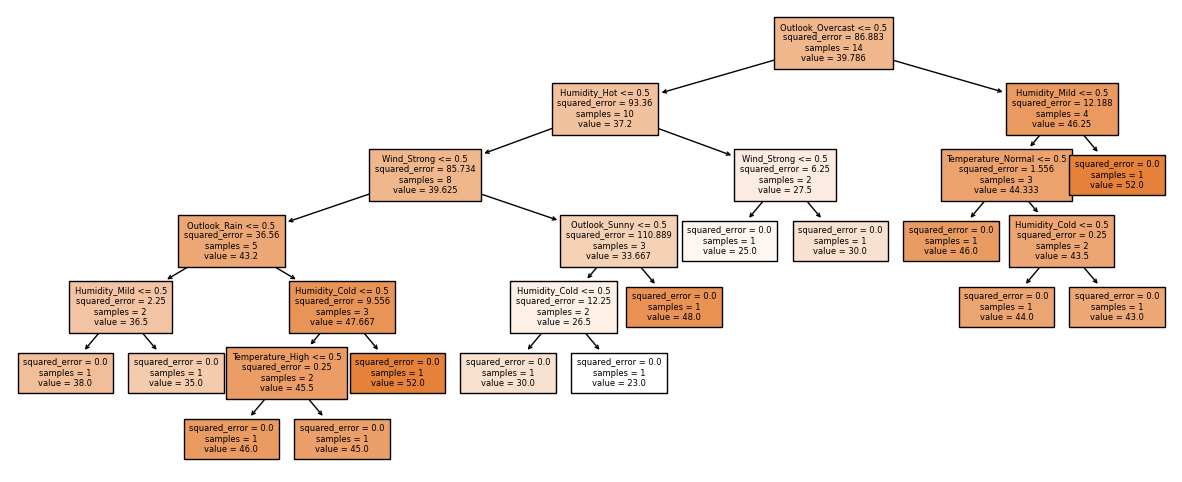

In [50]:
plt.figure(figsize=(15,6))
fig_tree = tree.plot_tree(clf, 
                          fontsize=6,
                          feature_names=X.columns,  
#                           class_names=['no disease', 'disease'],
                          filled=True)

### 6.4. Making Predictions

Finally, you can predict how much hours will be played on a particular day based on the weather conditions. For that, we need to pass feature values to the model. We are going to use `predict` method.

In [53]:
#Predicting a class with random values x and y

Outlook_Overcast=0
Outlook_Rain=1
Outlook_Sunny=0
Humidity_Cold=1
Humidity_Hot=0
Humidity_Mild=0
Temperature_High=1
Temperature_Normal=0
Wind_Strong=0

clf.predict([[Outlook_Overcast,
              Outlook_Rain,
              Outlook_Sunny,
              Humidity_Cold,
              Humidity_Hot,
              Humidity_Mild,
              Temperature_High,
              Temperature_Normal,
              Wind_Strong
             ]])

/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([52.])

You can see that it was estimated with 52 hours.

## 7. Further Readings

Check out more details on Decision Trees: http://localhost:8890/notebooks/Classification/decision_trees.ipynb